# 4-6. ハイパーパラメータ探索 †
4-fold Cross ValidationによってLogPapp予測値との平均2乗誤差(RMSE)が最も小さくなるパラメータを探索せよ（わかる人はoptuna等のベイズ最適化を利用して良い）。良いパラメータが探索できたら、そのときのRMSE値とQ^2値を求めよ。（RMSEおよびQ^2の式は論文中に記載がある）

In [1]:
import pandas as pd

desc_2d = pd.read_csv("data/2d_desc.csv", index_col=0)
df = pd.read_csv("data/fukunishi_data.csv", index_col=0)

In [2]:
# 説明変数に 2D記述子 を利用
X = desc_2d
 
# 目的変数に "Logp App" を利用
Y = df["LogP app"]

# grid search

# ridge

In [17]:
from sklearn import linear_model
from hyper_params import grid

params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

reg = linear_model.Ridge()

gs = grid(X, Y, params, reg)

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function cpu_count is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=FutureWarning)
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.01493e-69): result may not be accurate.
  overwrite_a=True).T


{'alpha': 0.01}


In [18]:
from calc_score import regression

f_model = linear_model.Ridge(**gs.best_params_)
regression(f_model, X, Y)

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.88115e-69): result may not be accurate.
  overwrite_a=True).T


best rmse: 0.74137
q2: 0.50480


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## optuna

In [10]:
import optuna
from sklearn.model_selection import KFold, cross_val_predict

from calc_score import calc_rmse

def objective(X, y, trial):
    params = {
        'alpha': trial.suggest_loguniform('alpha', 1e-4, 1e+1),
    }
    model_opt = linear_model.Ridge(**params)
    
    kf = KFold(n_splits=4, shuffle=True, random_state=42)   
    y_pred = cross_val_predict(model_opt, X, y, cv=kf)
    return calc_rmse(y, y_pred)

In [11]:
from functools import partial
from sklearn.model_selection import cross_val_predict

study_rmse = optuna.create_study(direction='minimize')
f = partial(objective, X, Y)
study_rmse.optimize(f, n_trials=100)
study_rmse.best_params

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.72645e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.87105e-64): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.71852e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.74215e-69): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:49,162] Finished trial#0 with value: 21.026505869669748 with

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.52848e-67): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:49,728] Finished trial#7 with value: 40.14002687721568 with parameters: {'alpha': 1.660560157316481}. Best is trial#1 with value: 11.10110773254181.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.25598e-67): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.52492e-62): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-c

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02024e-64): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.51941e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.55632e-70): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:50,388] Finished trial#15 with value: 4.096529964246284 with parameters: {'alpha': 0.004633038326660376}. Best is trial#15 with value: 4.096529964246284.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

[I 2020-04-07 20:22:50,971] Finished trial#22 with value: 8.247220633809192 with parameters: {'alpha': 0.008029327631646556}. Best is trial#15 with value: 4.096529964246284.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.01945e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09526e-64): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02302e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.27612e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.76902e-70): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:51,657] Finished trial#30 with value: 42.75654907026204 with parameters: {'alpha': 0.0006873346112449967}. Best is trial#15 with value: 4.096529964246284.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.51128e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12787e-68): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.10961e-68): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:52,936] Finished trial#45 with value: 67.73888300560617 with parameters: {'alpha': 0.06370234512333414}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.70685e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: I

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.80447e-68): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.76842e-68): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:54,235] Finished trial#60 with value: 76.9404165389084 with parameters: {'alpha': 0.10399306914707039}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.71676e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Il

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.36529e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.37893e-69): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:55,590] Finished trial#75 with value: 27.699837641811676 with parameters: {'alpha': 0.01797739555082256}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.33335e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.64003e-70): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63439e-70): result may not be accurate.
  overwrite_a=True).T
[I 2020-04-07 20:22:56,885] Finished trial#90 with value: 4.267874435526678 with parameters: {'alpha': 0.004153373237304884}. Best is trial#31 with value: 4.096451696287276.
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.76865e-69): result may not be accurate.
  overwrite_a=True).T
/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: 

{'alpha': 0.0046495583681653045}

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.68799e-70): result may not be accurate.
  overwrite_a=True).T


best rmse: 0.90052
q2: 0.38401


Ridge(alpha=0.0046495583681653045, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

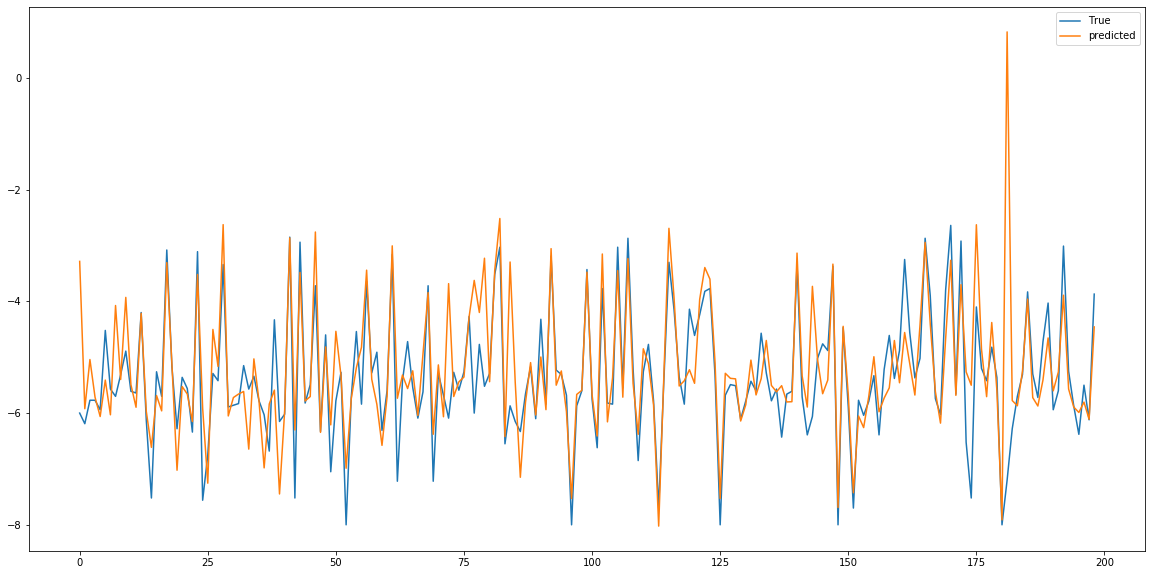

In [13]:
f_model = linear_model.Ridge(**study_rmse.best_params)
regression(f_model, X, Y, True)